# Project 2 Linear Algebra

### 1. Evaluate sin(x) via polynomials using a least square approach

In [1]:
using LinearAlgebra
using Statistics
using CairoMakie

In [2]:
# expansion coeffs
pmax = 20
# evaluation points
npoints = 1000
x = LinRange(0, π/2, npoints);

In [3]:
# target function
fstar(x) = sin(x);
b = fstar.(x);

In [4]:
# matrix
A = [x[i]^p for i in 1:npoints, p in 0:pmax];

In [5]:
# solve for coeffs
c = (A'*A) \ (A'* b);

In [6]:
# code for approximate fstar(x) = sin(x) on the interval [0,π/2] via plonomials using a least square approach with 1,000 evaluation points
function approxsin(p_max)
    pmax = p_max
    x = LinRange(0, π/2, npoints)
    fstar(x) = sin(x)
    b = fstar.(x)
    A = [x[i]^p for i in 1:npoints, p in 0:pmax]
    c = (A'*A)\ (A'*b)
    return A * c
end;

***

### 2. The error of approximation function


In [7]:
# L2 norm of the difference between the real, fstar(x), and approximation function, f(x).
function E(f1,fstar)
    return sqrt(mean((f1.-fstar).^2))
end;

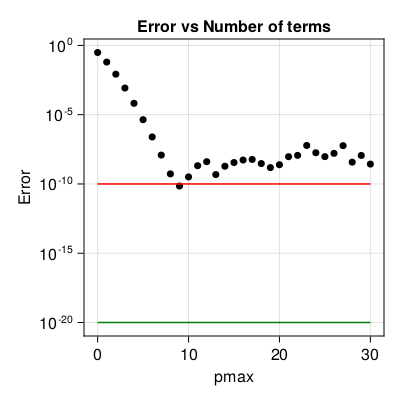

In [8]:
p_max = 30;
x = collect(range(0,p_max,length = p_max+1));
y = [E(approxsin(p),b) for p in x];
f = Figure(resolution = (400,400))
Axis(f[1, 1], title = "Error vs Number of terms", xlabel = "pmax", ylabel = "Error", yscale=log10)
plot!(x, y, markersize=10, color=:black)
lines!(x,zeros(size(x)).+1e-10, color = :red)
lines!(x,zeros(size(x)).+1e-20, color = :green)
f

In [9]:
findmin(y)

(7.121103024044396e-11, 10)

At the begining (pmax<10), when we increase the number of pmax, the error is going down until reach the lowest point at pmax = 10. After reached the lowest point, the error is fluactuated.

- What polynomial order (pmax) is required to satisfy E < 1.0e-10?

As you can see, there is one pmax that acheive the lowest which is 10.
- Why cant approach lower than 1e-20

It is because the accumulated error from fitting the fstar(x) and f(x).

***

### 3. Antisymmetric polynomials

In [10]:
# modify to use only antisymmetric polynomials

In [11]:
function Modapproxsin(p_max)
# Code for approximate fstar(x) = sin(x) on the interval [0,π/2] via plonomials using a least square approach with 1,000 evaluation points
    pmax = p_max
    x = LinRange(0, π/2, npoints)
    fstar(x) = sin(x)
    b = fstar.(x)
    A = [x[i]^p for i in 1:npoints, p in range(1, pmax, step = 2)]
    c = (A'*A)\ (A'*b)
    return A * c
end;

In [12]:
p_max = 2*p_max+1
oddrange = collect(range(1,p_max,step = 2));
xmod = oddrange
ymod = [E(Modapproxsin(pmax),b) for pmax in oddrange];


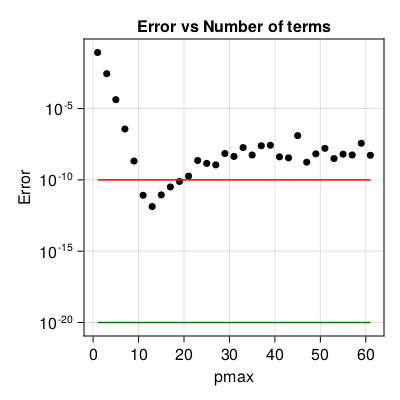

In [13]:
f = Figure(resolution = (400,400))
Axis(f[1, 1], title = "Error vs Number of terms", xlabel = "pmax", ylabel = "Error", yscale=log10)
plot!(xmod, ymod, markersize=10, color=:black)
lines!(xmod,zeros(size(xmod)).+1e-10, color = :red)
lines!(xmod,zeros(size(xmod)).+1e-20, color = :green)
f

In [14]:
findmin(ymod)

(1.347866361489308e-12, 7)

In [15]:
#Same computational cost comparison which is the # of polynomials
# first [0,1,2,3,4,5] = 6 polymials
# modified [1,3,5,7,9,11] = 6 polynomials
# then to compare the same computational cost, we use p_max for the fisrt is pmax and the modified is 2*pmax+1


In [16]:
x = collect(range(0,p_max,length = p_max+1));
y = [E(approxsin(p),b) for p in x];
ymod = [E(Modapproxsin(2*p+1),b) for p in x];


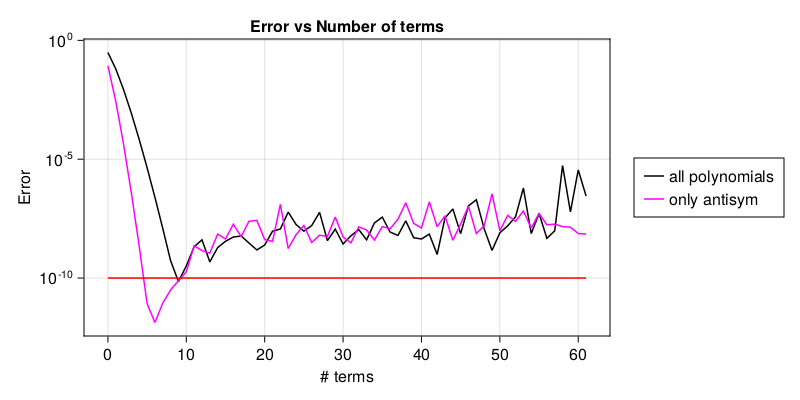

In [17]:
f = Figure(resolution = (800,400))

Axis(f[1, 1], title = "Error vs Number of terms", xlabel = "# terms", ylabel = "Error", yscale=log10)
l1 = lines!(x, y, markersize=10, color=:black)
l2 = lines!(x, ymod, markersize=10, color=:magenta)
lines!(x,zeros(size(x)).+1e-10, color = :red)
#lines!(x,zeros(size(x)).+1e-20, color = :green)
Legend(f[1,2],[l1,l2],["all polynomials","only antisym"])
f

In [18]:
findmin(y), findmin(ymod)

((7.121103024044396e-11, 10), (1.347866361489308e-12, 7))

***

### 4. Derivative function

For using only antisymmetric polynomials (magenta), we reached the new low at 7 terms.

4. a) Calculate

- The approximating function reads
\begin{equation}
    f(c, x) = \sum_{p=0}^{pmax} c_p x^p
\end{equation}

- The derivative of this is

\begin{equation}
 f'(c, x) = \sum_{p=1}^{pmax} c_pp x^{p-1}
\end{equation}
or 
\begin{equation}
 f'(c, x) = \sum_{p=0}^{pmax-1} x^{p}(p+1) c_{p+1} 
\end{equation}
- Define 

\begin{equation}
g(d, x) = \sum_{p=0}^{pmax} x^pd_p 
\end{equation}

- Set $g(d, x) = f'(c, x)$, we can solve for $\vec{d}$ by comparing order of p order by order. 


$d_p = (p+1)c_{p+1}$ & $d_{pmax} = 0$  

We can express via linear operator $\vec{d} = D\vec{c}$ by defining D as

$D = (i+1)δ_{i,i+1}$

4. b) Calculate D numerically

$d_p = (p+1)c_{p+1}$ & $d_{pmax} = 0$  

$(p+1)c_{p+1} = Dc_p$

In [19]:
#Code for find derivative given coff c
ccopy = copy(c);
c_new = deleteat!(ccopy,1);
c_new = append!(c_new,0);
d = [c_new[i]*i for i in 1:size(c_new,1)];

In [20]:
#Test code

In [21]:
# approx cos(x) function
function approxcos(p_max)
    pmax = p_max
    npoints = 1000
    x = LinRange(0, π/2, npoints)
    fstar(x) = cos(x)
    b = fstar.(x)
    A = [x[i]^p for i in 1:npoints, p in 0:pmax]
    c = (A'*A)\ (A'*b)
    return A * c
end;

In [22]:
# approx sin(x) function and then take derivative so they should give us cos(x) function
function dapproxsin(p_max)
    pmax = p_max
    x = LinRange(0, π/2, npoints)
    fstar(x) = sin(x)
    b = fstar.(x)
    A = [x[i]^p for i in 1:npoints, p in 0:pmax]
    c = (A'*A)\ (A'*b)
    ccopy = copy(c);
    c_new = deleteat!(ccopy,1);
    c_new = append!(c_new,0);
    d = [c_new[i]*(i) for i in 1:size(c_new,1)];
    D = d / c ;
    return A * d
end;

In [23]:
# check that Dsin(x) ≈ cos(x)
isapprox(approxcos(12),dapproxsin(12), atol = 10^-5)

true

***